In [53]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Nettoyage de données exclusivement avec Pandas

In [ ]:
import pandas as pd

# Chargement initial
df = pd.read_csv('total_stars.csv')

# Suppression colonnes inutiles
cols_to_drop = ['Unnamed: 0.1', 'Unnamed: 6', 'Unnamed: 0', 
                'Star_name.1', 'Distance.1', 'Mass.1', 'Radius.1']
df.drop(columns=cols_to_drop, inplace=True)

# Renommer colonnes
df.columns = ['Star_name', 'Distance', 'Mass', 'Radius', 'Luminosity']

# Corriger le décalage après la ligne 97
df.loc[97:, ['Distance', 'Mass', 'Radius']] = df.loc[97:, ['Mass', 'Radius', 'Luminosity']].values

# Correction complète, incluant extraction des nombres valides clairement
for col in ['Distance', 'Mass', 'Radius', 'Luminosity']:
    # Remplacer virgules par points
    df[col] = df[col].str.replace(r'(\d+),(\d+)', r'\1.\2', regex=True)
    # Retirer les zéros initiaux inutiles
    df[col] = df[col].replace(r'^0+(\d+)', r'\1', regex=True)
    # Extraire explicitement la partie numérique (incluant les nombres décimaux)
    df[col] = df[col].str.extract(r'(\d+\.\d+|\d+)', expand=False)
    # Conversion finale en numérique
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Supprimer uniquement les lignes où la Distance, Mass, ou Radius est NaN après conversion
df.dropna(subset=['Distance', 'Mass', 'Radius'], inplace=True)

# Sélection finale
df_final = df[['Distance', 'Mass', 'Radius']]

# Sauvegarde finale propre
df_final.to_csv('final_stars.csv', index=False)

# Vérification des resultats
print(df_final.head(100))


       Distance       Mass     Radius
0      0.000016   1.000000   1.000000
1      8.600000   2.100000   1.710000
2    310.000000  15.000000  71.000000
3      4.400000   1.100000   1.200000
4     37.000000   1.100000  26.000000
..          ...        ...        ...
101   31.000000   0.040093   0.096597
102   28.600000   0.040093   0.096597
103   57.000000   0.021956   0.166476
104   40.000000   0.011455   0.133592
105   34.000000   0.038184   0.096597

[100 rows x 3 columns]


## Normalisation des données

In [55]:
# Chargement du fichier
df_final = pd.read_csv('final_stars.csv')

# ----- Normalisation MinMax -----
# Formule : (x - min) / (max - min)
df_minmax = df_final.copy()
for col in df_minmax.columns:
    min_val = df_minmax[col].min()
    max_val = df_minmax[col].max()
    df_minmax[col] = (df_minmax[col] - min_val) / (max_val - min_val)

# Sauvegarde du jeu de données MinMax normalisé
df_minmax.to_csv('stars_minmax_normalized.csv', index=False)

# ----- Normalisation MaxAbs -----
# Formule : x / |max|
df_maxabs = df_final.copy()
for col in df_maxabs.columns:
    max_abs_val = df_maxabs[col].abs().max()
    df_maxabs[col] = df_maxabs[col] / max_abs_val

# Sauvegarde du jeu de données MaxAbs normalisé
df_maxabs.to_csv('stars_maxabs_normalized.csv', index=False)

# Affichage de vérification
print("--- Données normalisées avec MinMax ---")
print(df_minmax.head())

print("\n--- Données normalisées avec MaxAbs ---")
print(df_maxabs.head())


--- Données normalisées avec MinMax ---
   Distance      Mass    Radius
0  0.000000  0.003445  0.001010
1  0.008190  0.007238  0.001741
2  0.295238  0.051721  0.073028
3  0.004190  0.003790  0.001216
4  0.035238  0.003790  0.026731

--- Données normalisées avec MaxAbs ---
       Distance      Mass    Radius
0  1.506000e-08  0.003448  0.001029
1  8.190476e-03  0.007241  0.001759
2  2.952381e-01  0.051724  0.073045
3  4.190476e-03  0.003793  0.001235
4  3.523810e-02  0.003793  0.026749


## Visualisation des clusters (Matplotlib)

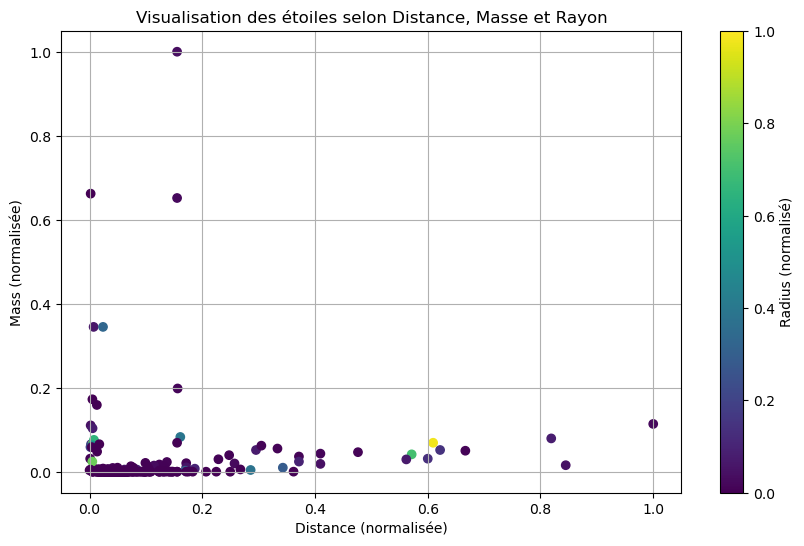

In [56]:
# Chargement du fichier normalisé MinMax pour visualisation
df_minmax = pd.read_csv('stars_minmax_normalized.csv')

# Création du graphique : Distance vs Mass avec la couleur selon Radius
plt.figure(figsize=(10, 6))
plt.scatter(df_minmax['Distance'], df_minmax['Mass'], c=df_minmax['Radius'], cmap='viridis')
plt.colorbar(label='Radius (normalisé)')
plt.xlabel('Distance (normalisée)')
plt.ylabel('Mass (normalisée)')
plt.title('Visualisation des étoiles selon Distance, Masse et Rayon')
plt.grid(True)
plt.show()

## Choix de l'estimateur scikit-learn

c:\Users\Hp_pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


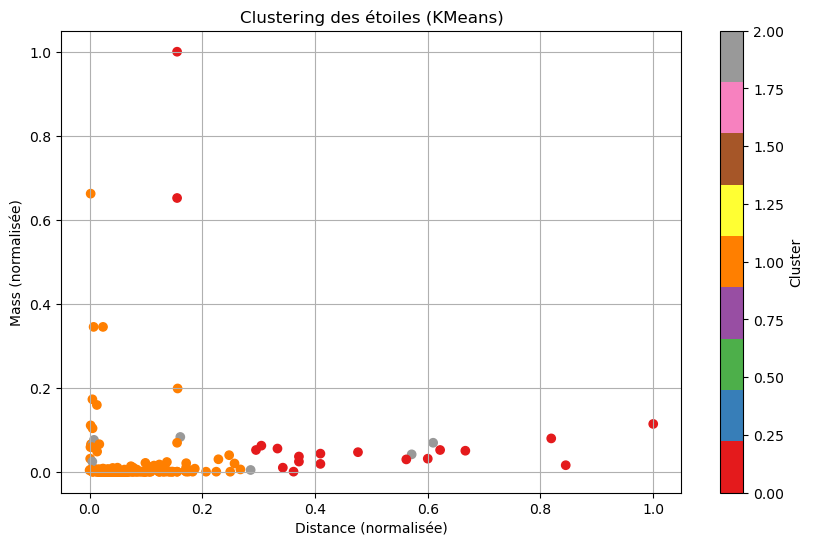

In [57]:
# Chargement du jeu de données normalisé (MinMax)
df_minmax = pd.read_csv('stars_minmax_normalized.csv')

# On utilise uniquement les colonnes Distance, Mass, Radius
X = df_minmax[['Distance', 'Mass', 'Radius']]

# Appliquer KMeans avec 3 clusters (par exemple)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Ajouter les labels de clusters au dataframe
df_minmax['Cluster'] = kmeans.labels_

# Visualisation des clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_minmax['Distance'], df_minmax['Mass'], c=df_minmax['Cluster'], cmap='Set1')
plt.xlabel('Distance (normalisée)')
plt.ylabel('Mass (normalisée)')
plt.title('Clustering des étoiles (KMeans)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


## Entraînement du modèle (KMeans)

In [58]:
# Chargement des données normalisées (MinMax)
df_minmax = pd.read_csv('stars_minmax_normalized.csv')
X = df_minmax[['Distance', 'Mass', 'Radius']]

# Entraînement du modèle KMeans
model = KMeans(n_clusters=3, random_state=42)
model.fit(X)

# Affecter les labels prédits au DataFrame
df_minmax['Cluster'] = model.labels_

# Sauvegarde du DataFrame avec les clusters inclus
df_minmax.to_csv('stars_minmax_with_clusters.csv', index=False)

print("Modèle entraîné avec succès. Labels de clusters attribués.")

Modèle entraîné avec succès. Labels de clusters attribués.


c:\Users\Hp_pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## Affichage des groupes dans le graphique avec matplotlib

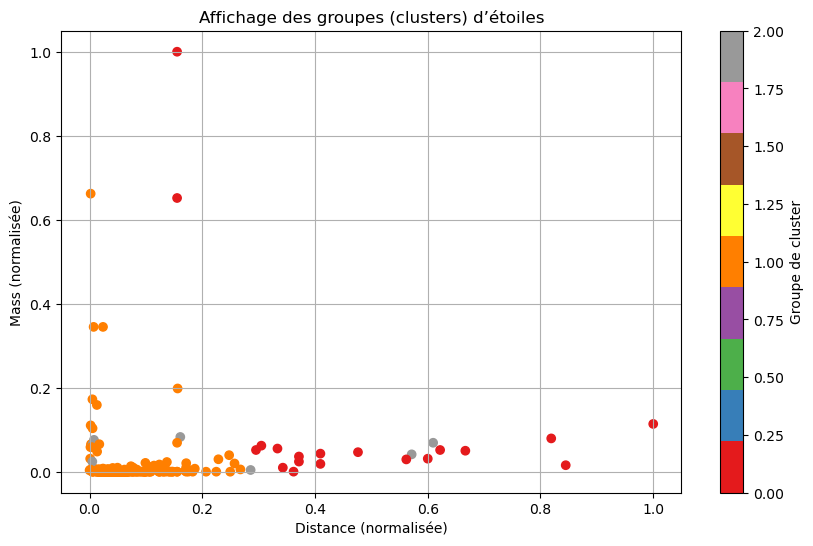

In [59]:
# Recharger le DataFrame avec les clusters
df_minmax = pd.read_csv('stars_minmax_with_clusters.csv')

# Affichage graphique des clusters (groupes)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_minmax['Distance'], df_minmax['Mass'], 
                      c=df_minmax['Cluster'], cmap='Set1')

plt.xlabel('Distance (normalisée)')
plt.ylabel('Mass (normalisée)')
plt.title('Affichage des groupes (clusters) d’étoiles')
plt.colorbar(scatter, label='Groupe de cluster')
plt.grid(True)
plt.show()


## Prédiction du cluster pour l’étoile Alnair

In [60]:
# 1. l'étoile Alnair
new_star = pd.DataFrame([{
    'Distance': 101,
    'Mass': 4.0,
    'Radius': 3.4
}])

# 2. Normalisation MinMax identique à l'entraînement
# On récupère les min/max du jeu d'origine
min_vals = df_minmax[['Distance', 'Mass', 'Radius']].min()
max_vals = df_minmax[['Distance', 'Mass', 'Radius']].max()
new_star_normalized = (new_star - min_vals) / (max_vals - min_vals)

# 3. Prédiction du cluster
cluster_pred = model.predict(new_star_normalized)[0]

# 4. Combien d’étoiles dans ce groupe
nb_in_group = df_minmax[df_minmax['Cluster'] == cluster_pred].shape[0]

# 5. Résultat
print(f"L’étoile 'Alnair' appartient au cluster numéro {cluster_pred}.")
print(f"Il y a déjà {nb_in_group} étoiles dans ce groupe.")

L’étoile 'Alnair' appartient au cluster numéro 0.
Il y a déjà 19 étoiles dans ce groupe.
